In this notebook you will use the CIFAR10 dataset. It can be a bit long to download. **So start by downloading the dataset**.

**Objectives:**
- How to build and train a convolutional neural network
- Colored images classification with CIFAR-10
- Convolutional Networks (with pooling, batch-norm)

**Reminder on notebook:**
This notebook is a template of what could be explored. You can follow it or explore and experiment additional things. Use the notebook to add your comments, figures, .... You can remove and reorganize it as you wish.

In [ ]:
# math, numpy and plot
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
# torch
import torch as th
import torch.autograd as autograd
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

# Dataset: CIFAR-10

First the dataset !  For images in pytorch, we expect the dataset to be a Tensor with 4 dimensions $(N,C,H,W)$ with :
- N the batch dimension, *i.e* the number of images
- C the number of input channels, here it is 3
- H the height or number of rows of each image
- W the width  or number of columns of each image




To experiment image classification on a coloured image, we can use the CIFAR-10 dataset.
You can find more details for instance on this page: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html. We can download the dataset and handle it with a dataloader.  

With this example we will use a **dataset** via a **dataloader**.  This is a convenient tool to handle datasets with efficient iterators. There is a [tutorial here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). But for the moment, you can just follow the next cells.

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


alltrainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


To be faster in the experiments, we can use a subset of the data with only N=10000 images.
    

In [ ]:
N = 10000
#trainset = th.utils.data.Subset(alltrainset, range(N))
trainset=alltrainset

And then plug a dataloader on the dataset for an easy iteration over it.

In [ ]:
len(testset)


10000

In [ ]:
batch_size = 400

trainloader = th.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testloader = th.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

## Look at some images

In [ ]:
def imshow(img,small=True):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fs = None
    if small:
        fs = (2,2)
    else:
        fs = (16,16)
    fig , ax= plt.subplots(figsize=fs)
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


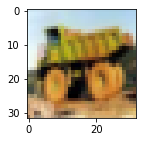

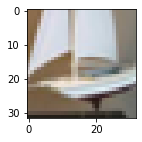

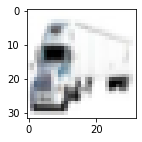

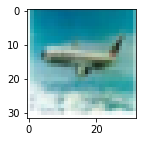

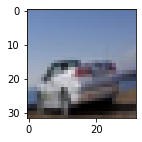

In [ ]:
for i in np.random.randint(0,N,5):
    imshow(trainset[i][0])

## Training a simple model



**TODO**:
- Create a convolutional model with 32 output channels, kernel_size=(7,7),stride=(2,2), padding=(3,3), and bias=False. A Maxpooling and a linear classifier can follow this convolution part.
- Train this model on the trainset.
- Then write two functions, one to train a model and the other to compute the validation score.


torch.Size([1, 3, 32, 32])
torch.Size([1, 16, 16, 16])
1
torch.Size([1, 16, 8, 8])
torch.Size([1, 1024])
tensor([[0.0727, 0.0895, 0.1221, 0.0743, 0.0966, 0.0873, 0.1150, 0.0967, 0.1395,
         0.1064]], grad_fn=<SoftmaxBackward0>)


In [ ]:
def validation_score(model, dsetloader, device):
    # TODO



In [ ]:
def trainer(model, trainsetloader, validsetloader, lr=1e-4, nepoch=10):
    """This function trains
    - a pytorch model
    - on a train data set given its dataloader (trainsetloader)
    - after each epoch the validation score is computed (validsetloader)
    - lr = the initial learning rate of Adam
    - nepoch : the number of epochs for training
    """
    #### TODO
    return None # to remove


In [ ]:
#### TODO:  Define the model, and train it



# More convolution

- Try to add a Batchnorm Layer
- Try a network with more progressive convolutions and pooling.